# Miscellaneous notes on networkx

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from math import log
import random, logging, sys, time

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from utils.gen import kleinberg_ring, kleinberg
from utils.search import greedy_path, RoutingSimulator, RoutingError
from utils.misc import id_assign_ordered, id_assign_random, id_dist_ring, shuffle_position_ring, frac_local_contact
from utils.misc import ordered_circular_layout, draw_autocrop, labels_from_attr, color_path
from utils.mcmc import mh_swap

logger = logging.getLogger('main')
logging.basicConfig(level=logging.INFO, stream=sys.stderr)
plt.rcParams["figure.figsize"] = (30,30)
plt.rcParams["axes.titlesize"] = 50
plt.rcParams["axes.labelsize"] = 30
plt.rcParams["font.size"] = 30

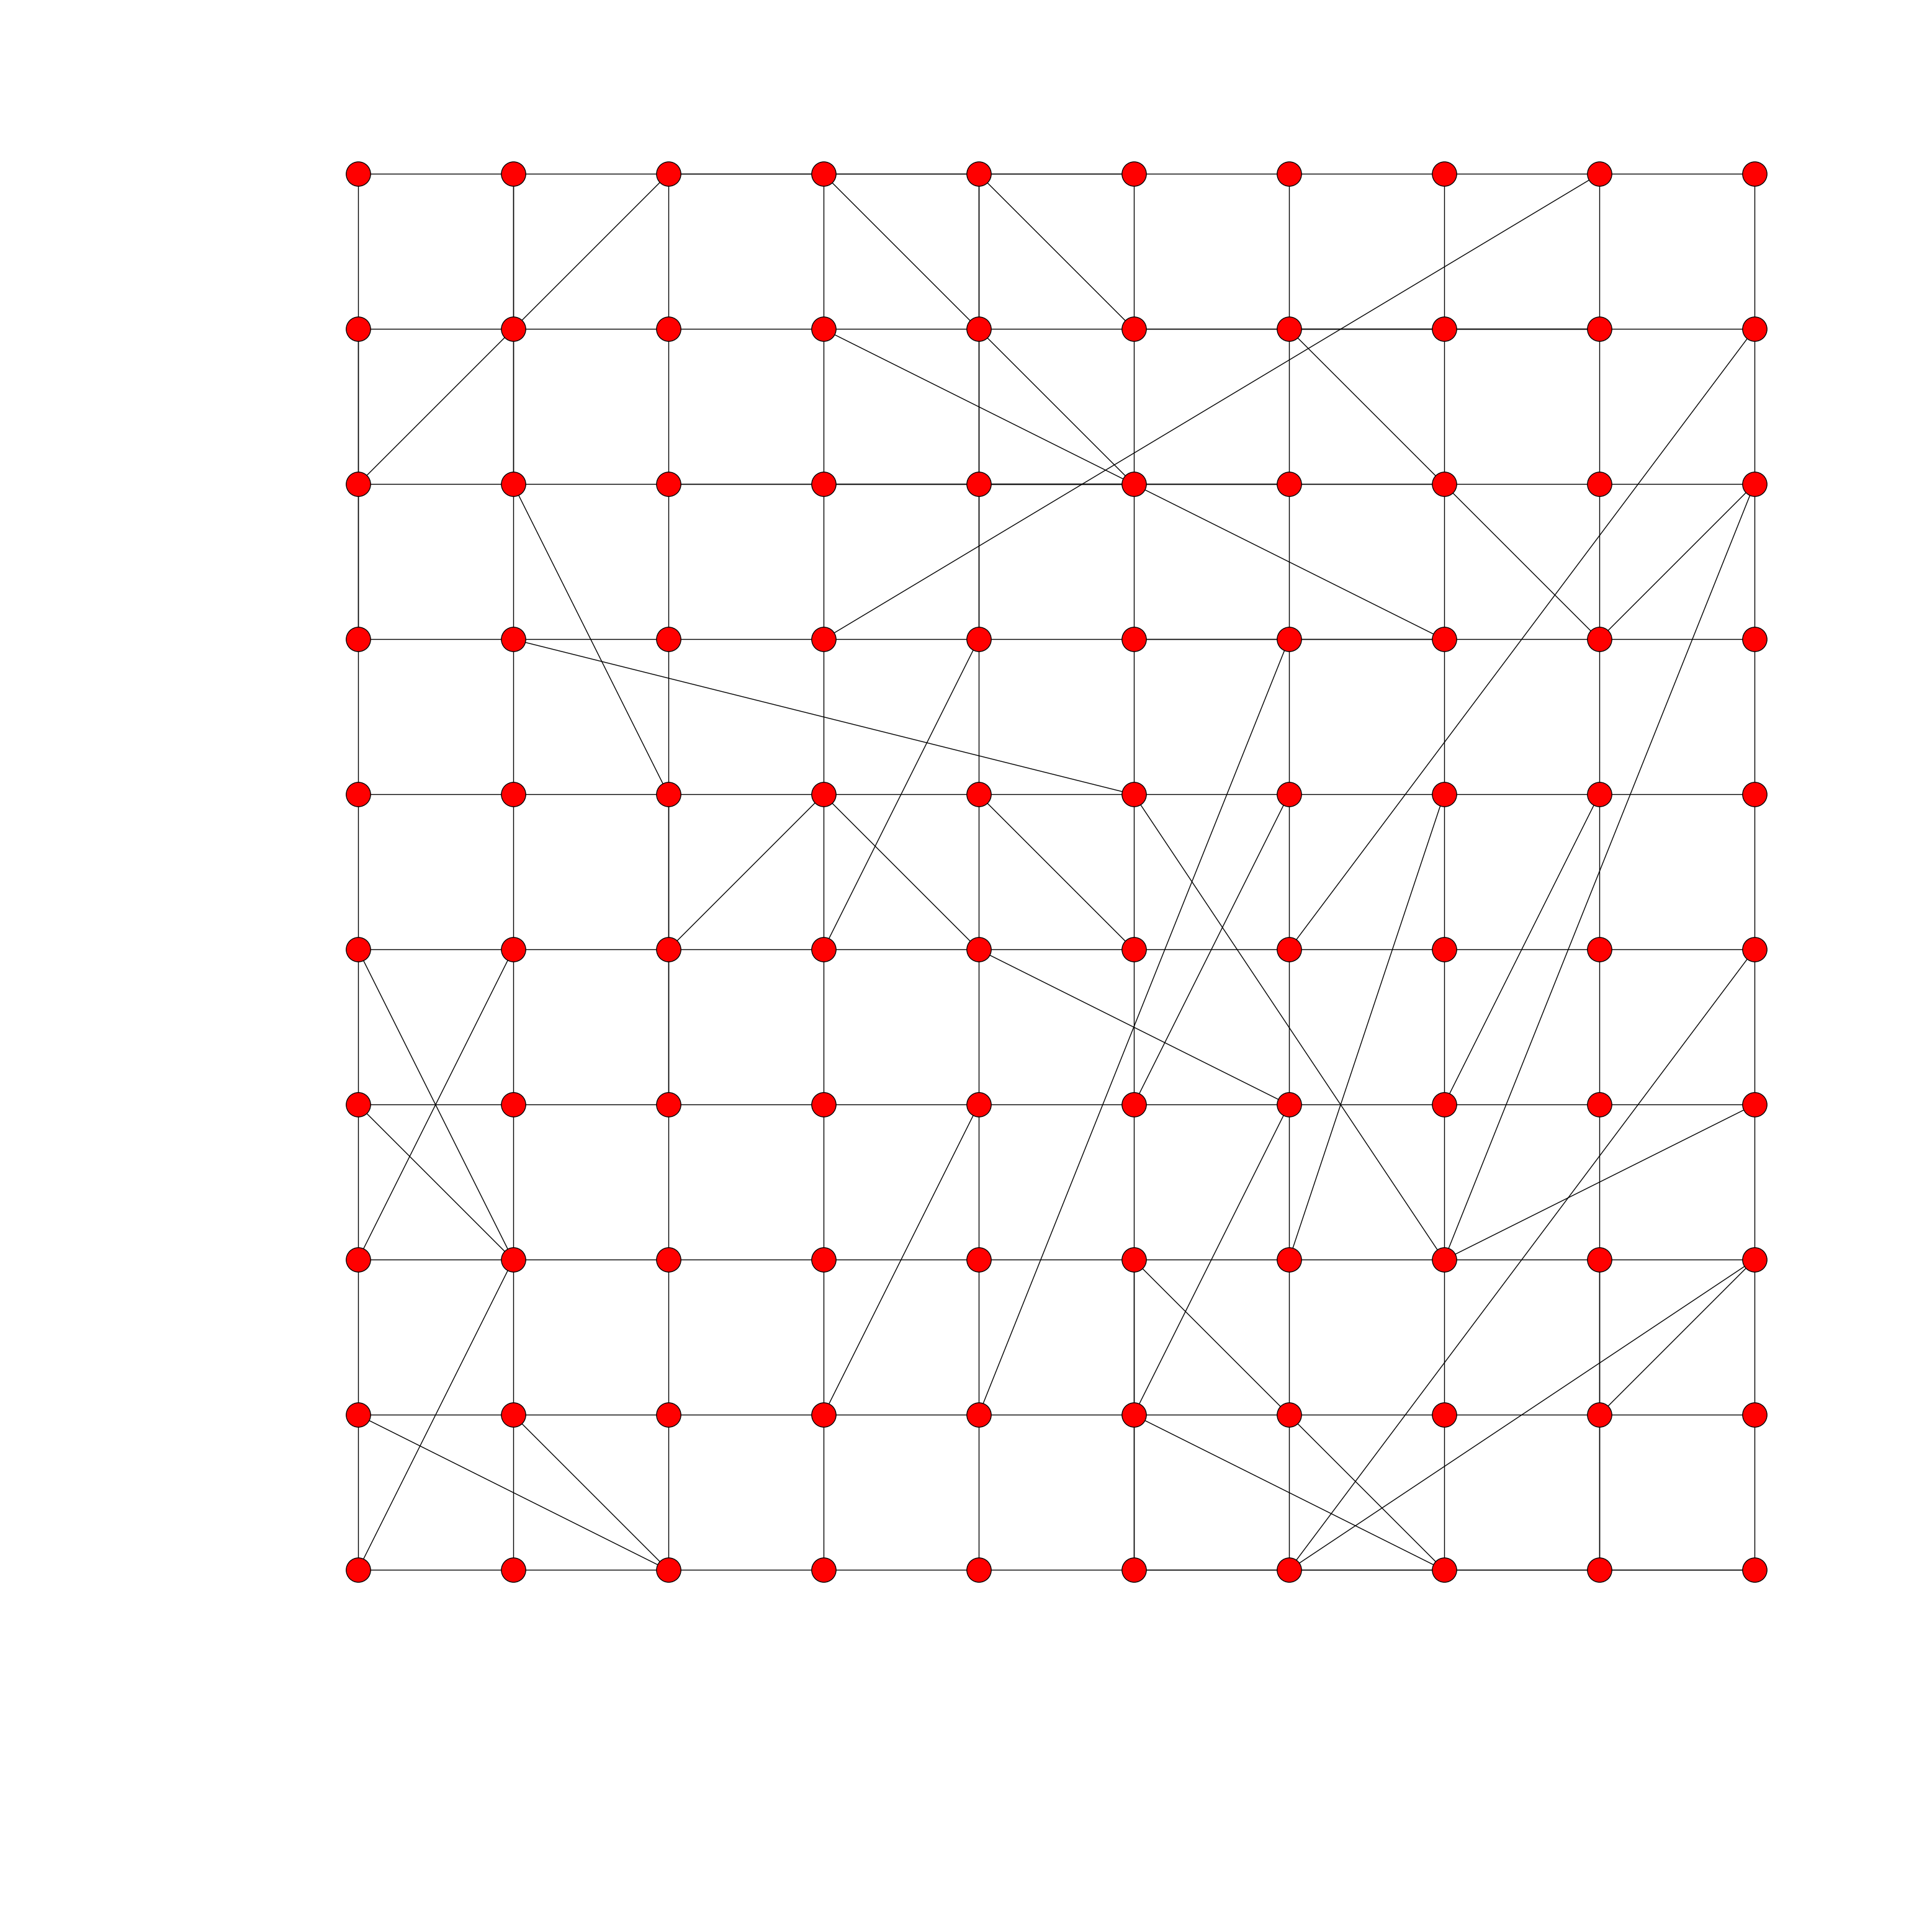

In [2]:
n = 10
p = 1
q = 1
r = 2
dim =2
G = kleinberg(n, p, q, r, dim)
#plt.title('Kleinberg model: $K({},{},{},{})$'.format(n,p,q,r))
nx.draw(G, pos=dict(zip(G,G)), node_size=800)
#plt.savefig("fig/kleinberg_2dim.eps")

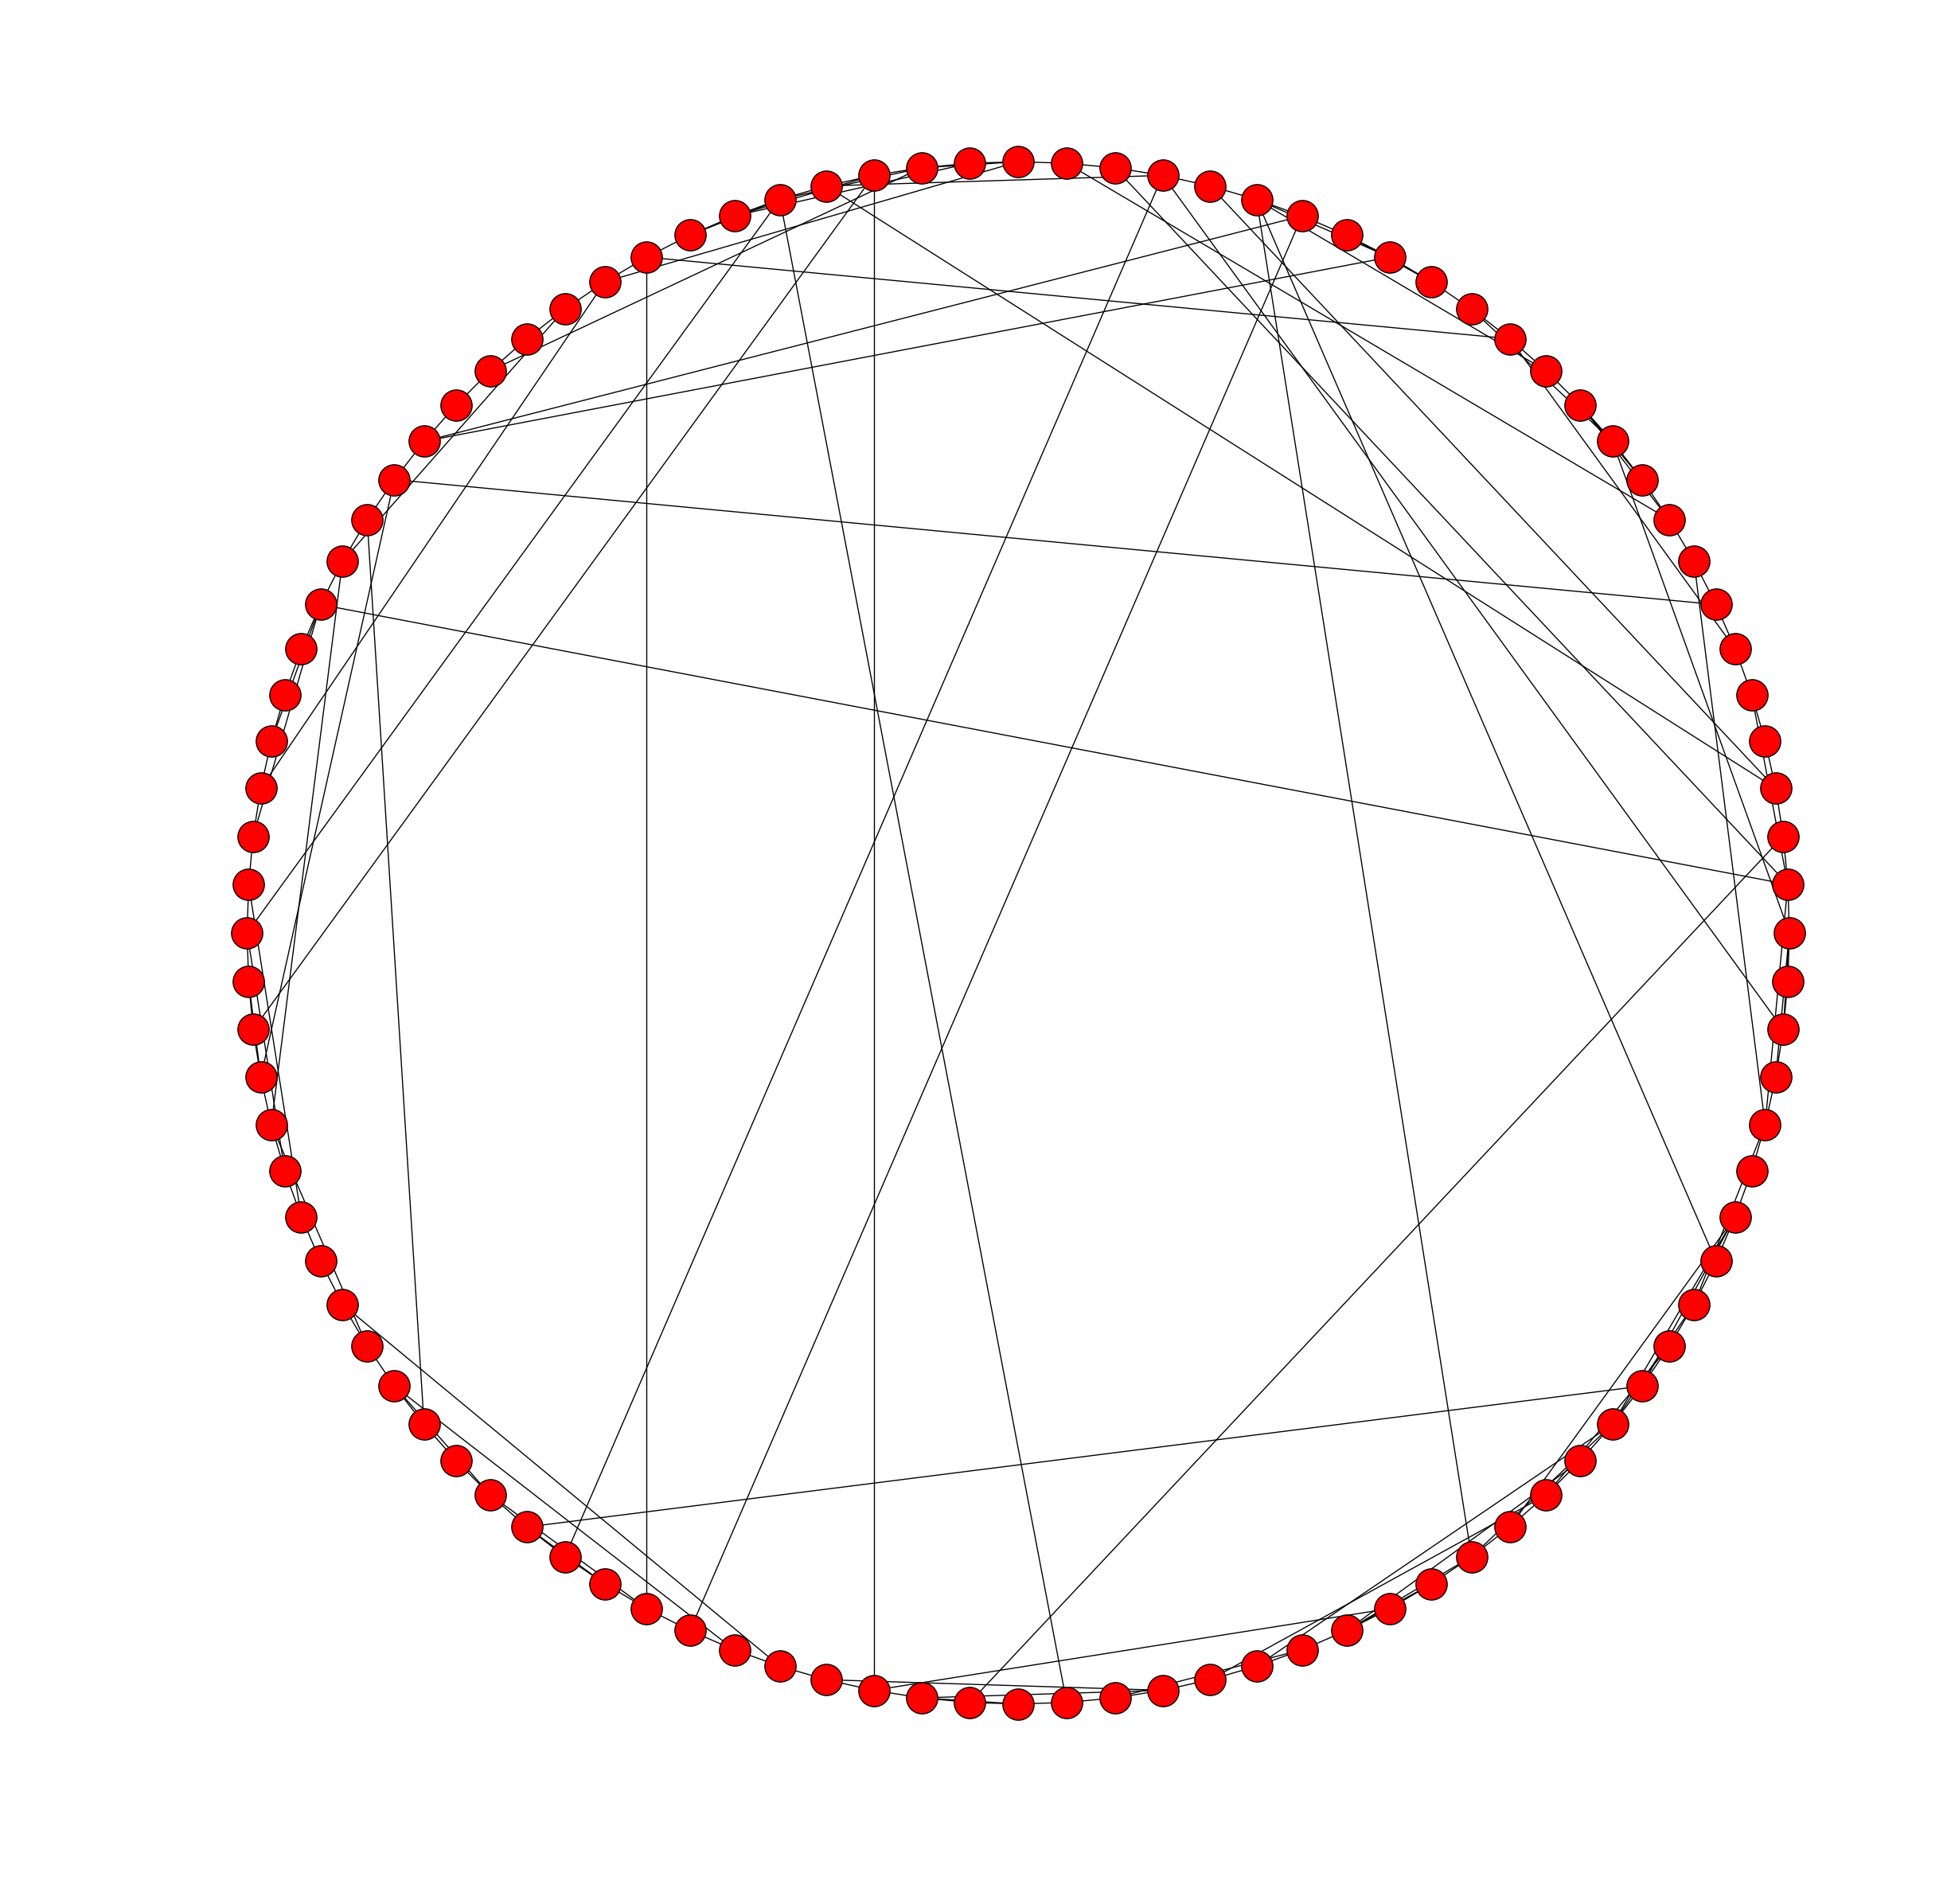

In [3]:
n = 100
p = 1
q = 1
r = 1
G = kleinberg_ring(n, p, q, r)
#plt.title('Kleinberg model: $K({},{},{},{})$'.format(n,p,q,r))
pos = nx.circular_layout(G)
draw_autocrop(plt, pos)
nx.draw(G, pos=pos, node_size=800)
#plt.savefig("fig/kleinberg_1dim.eps")

# $D^2$-$DFS$ debugging

INFO:utils.misc:[(0.0, 0.2), (0.2, 0.3), (0.3, 0.2), (0.2, 0.7), (0.7, 0.8), (0.8, 0.7), (0.7, 0.85), (0.85, 0.35)]


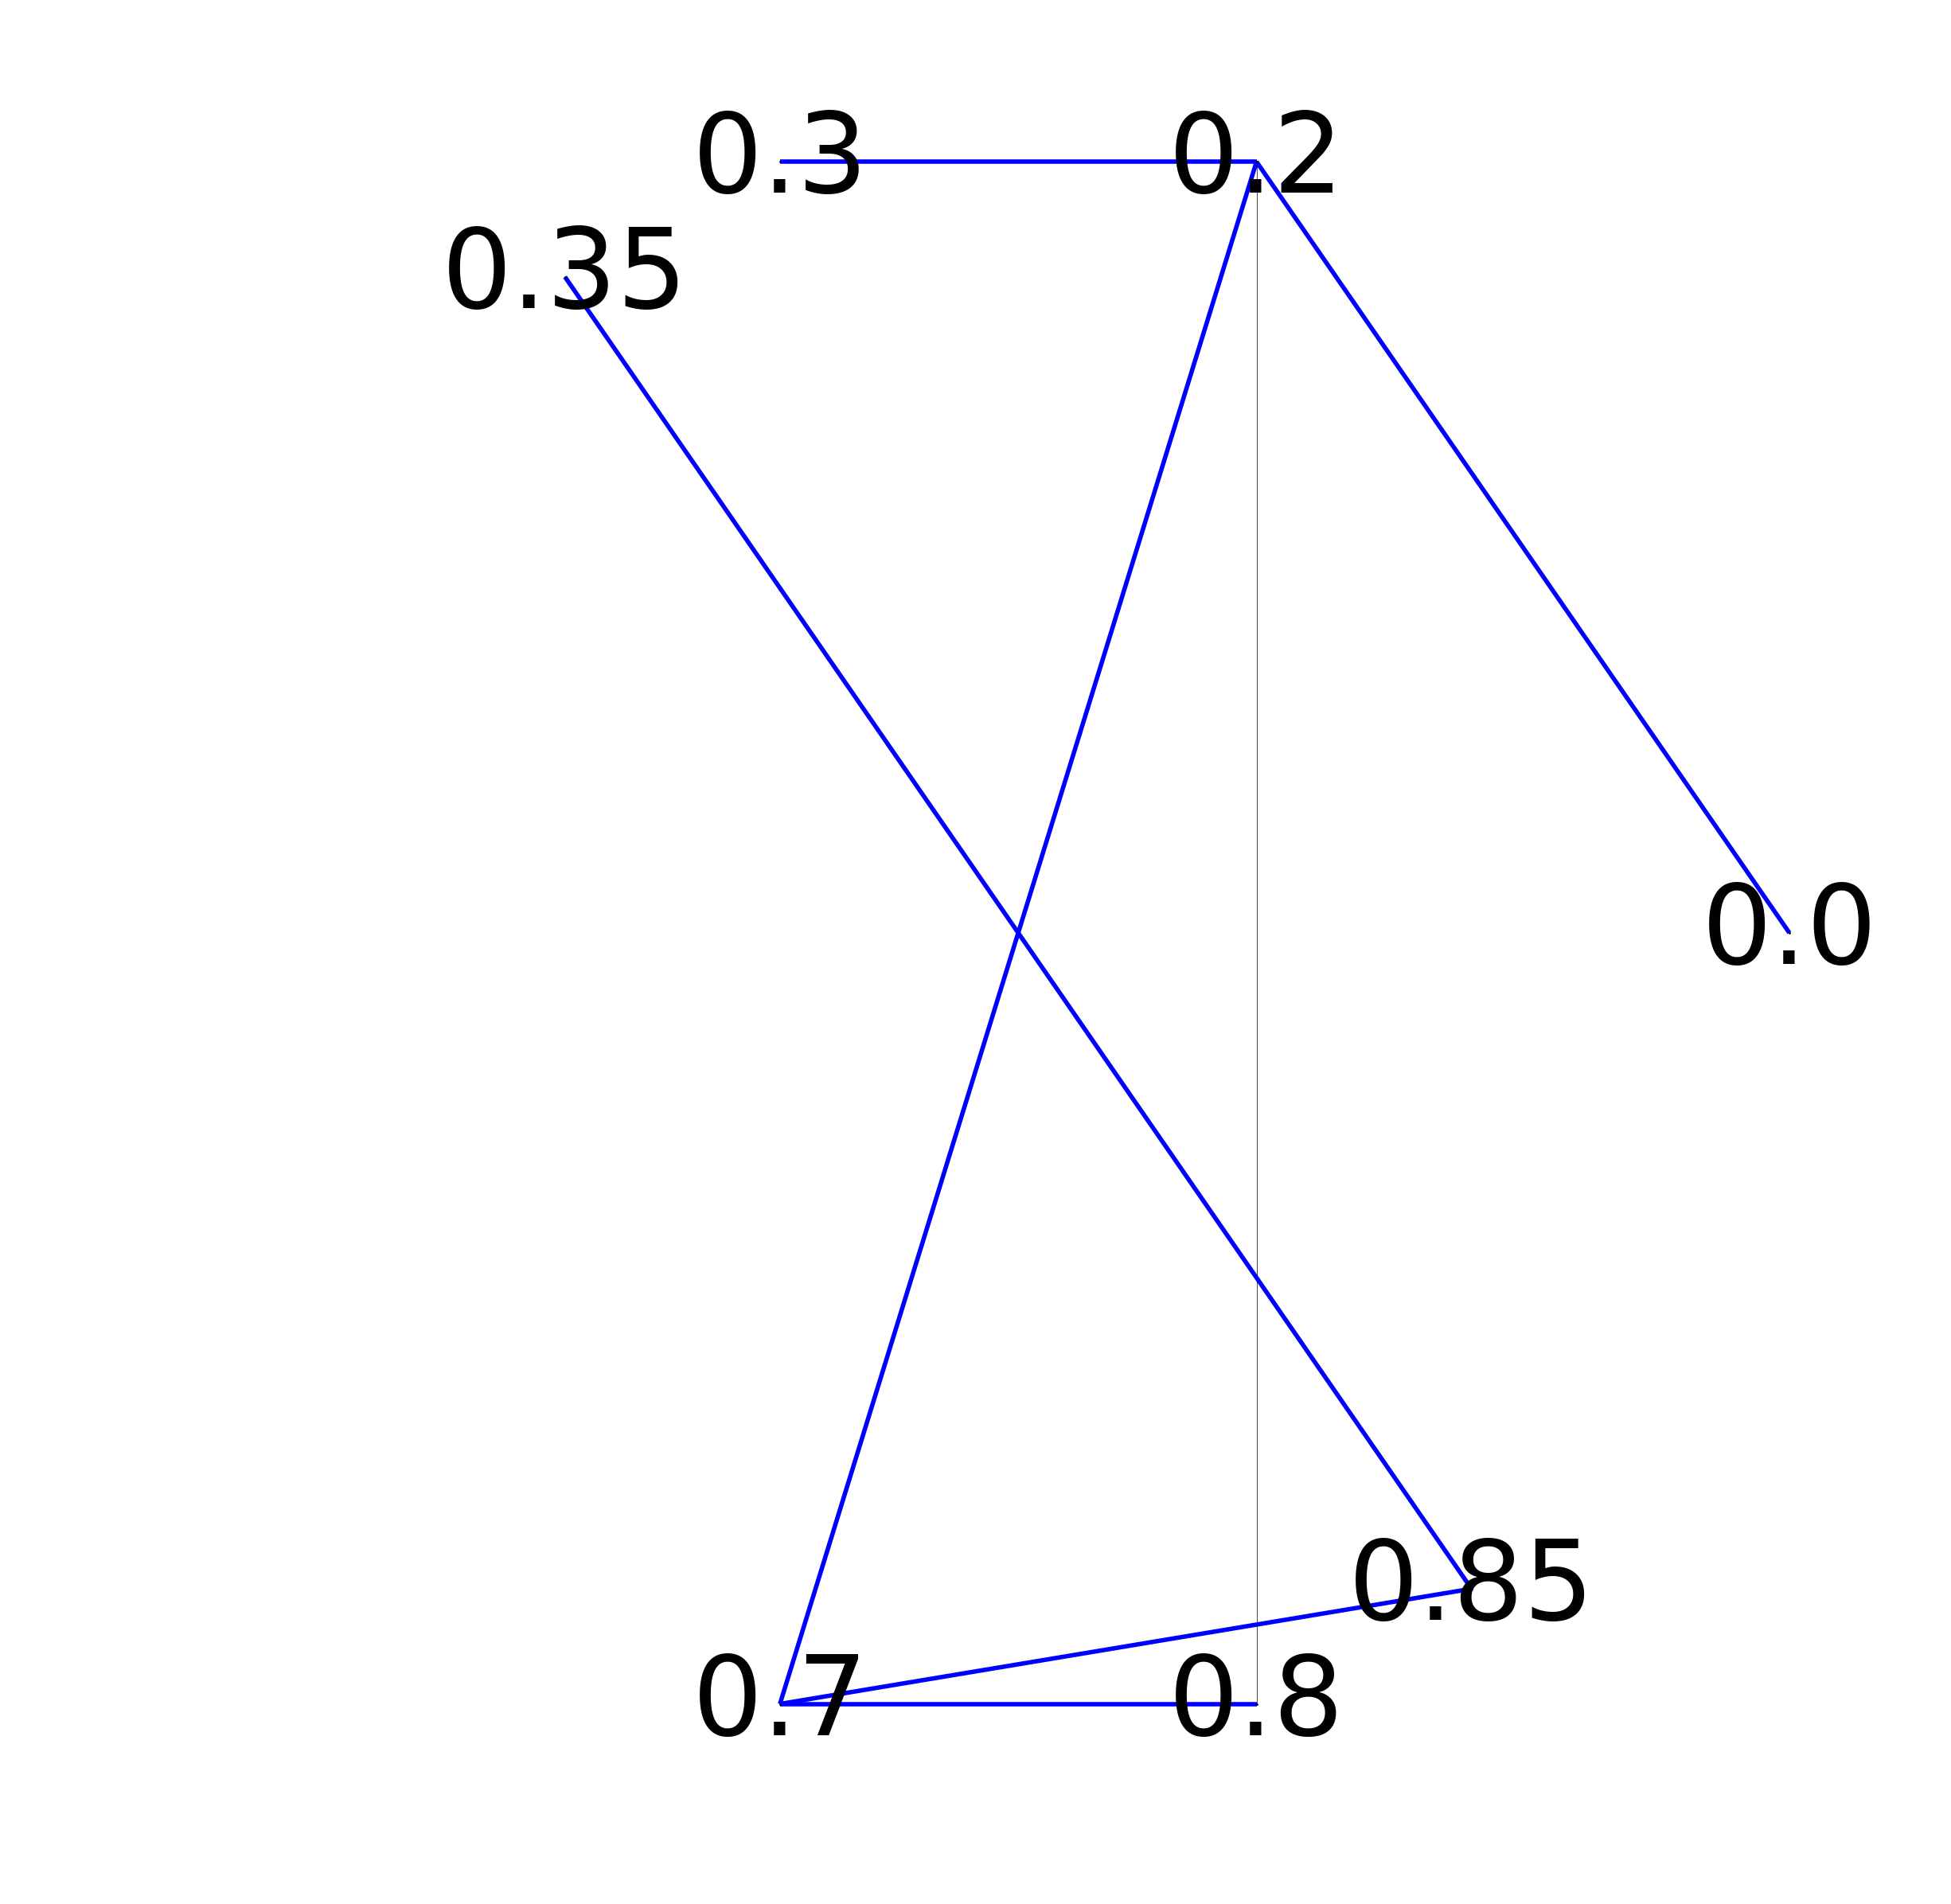

In [13]:
G = nx.Graph()
G.add_edges_from([(0.0,0.2), (0.2,0.3), (0.2,0.7), (0.2,0.8),(0.7,0.8),(0.7,0.85),(0.8,0.2),(0.85,0.35)])

logging.root.setLevel(logging.INFO)
path, labels, step = greedy_path(G, 0.0, 0.35,ttl=10,strict=False, post_allvstd=1)
eclist, ewlist = color_path(G, path)
pos = ordered_circular_layout(G)
draw_autocrop(plt, pos)
nx.draw(G, pos=pos, with_labels=True, node_size=1, node_color='w', edge_color=eclist, width=ewlist,font_size=100)

# $D^3$-$DFS$

INFO:utils.misc:[(0.8, 0.75), (0.75, 0.01)]


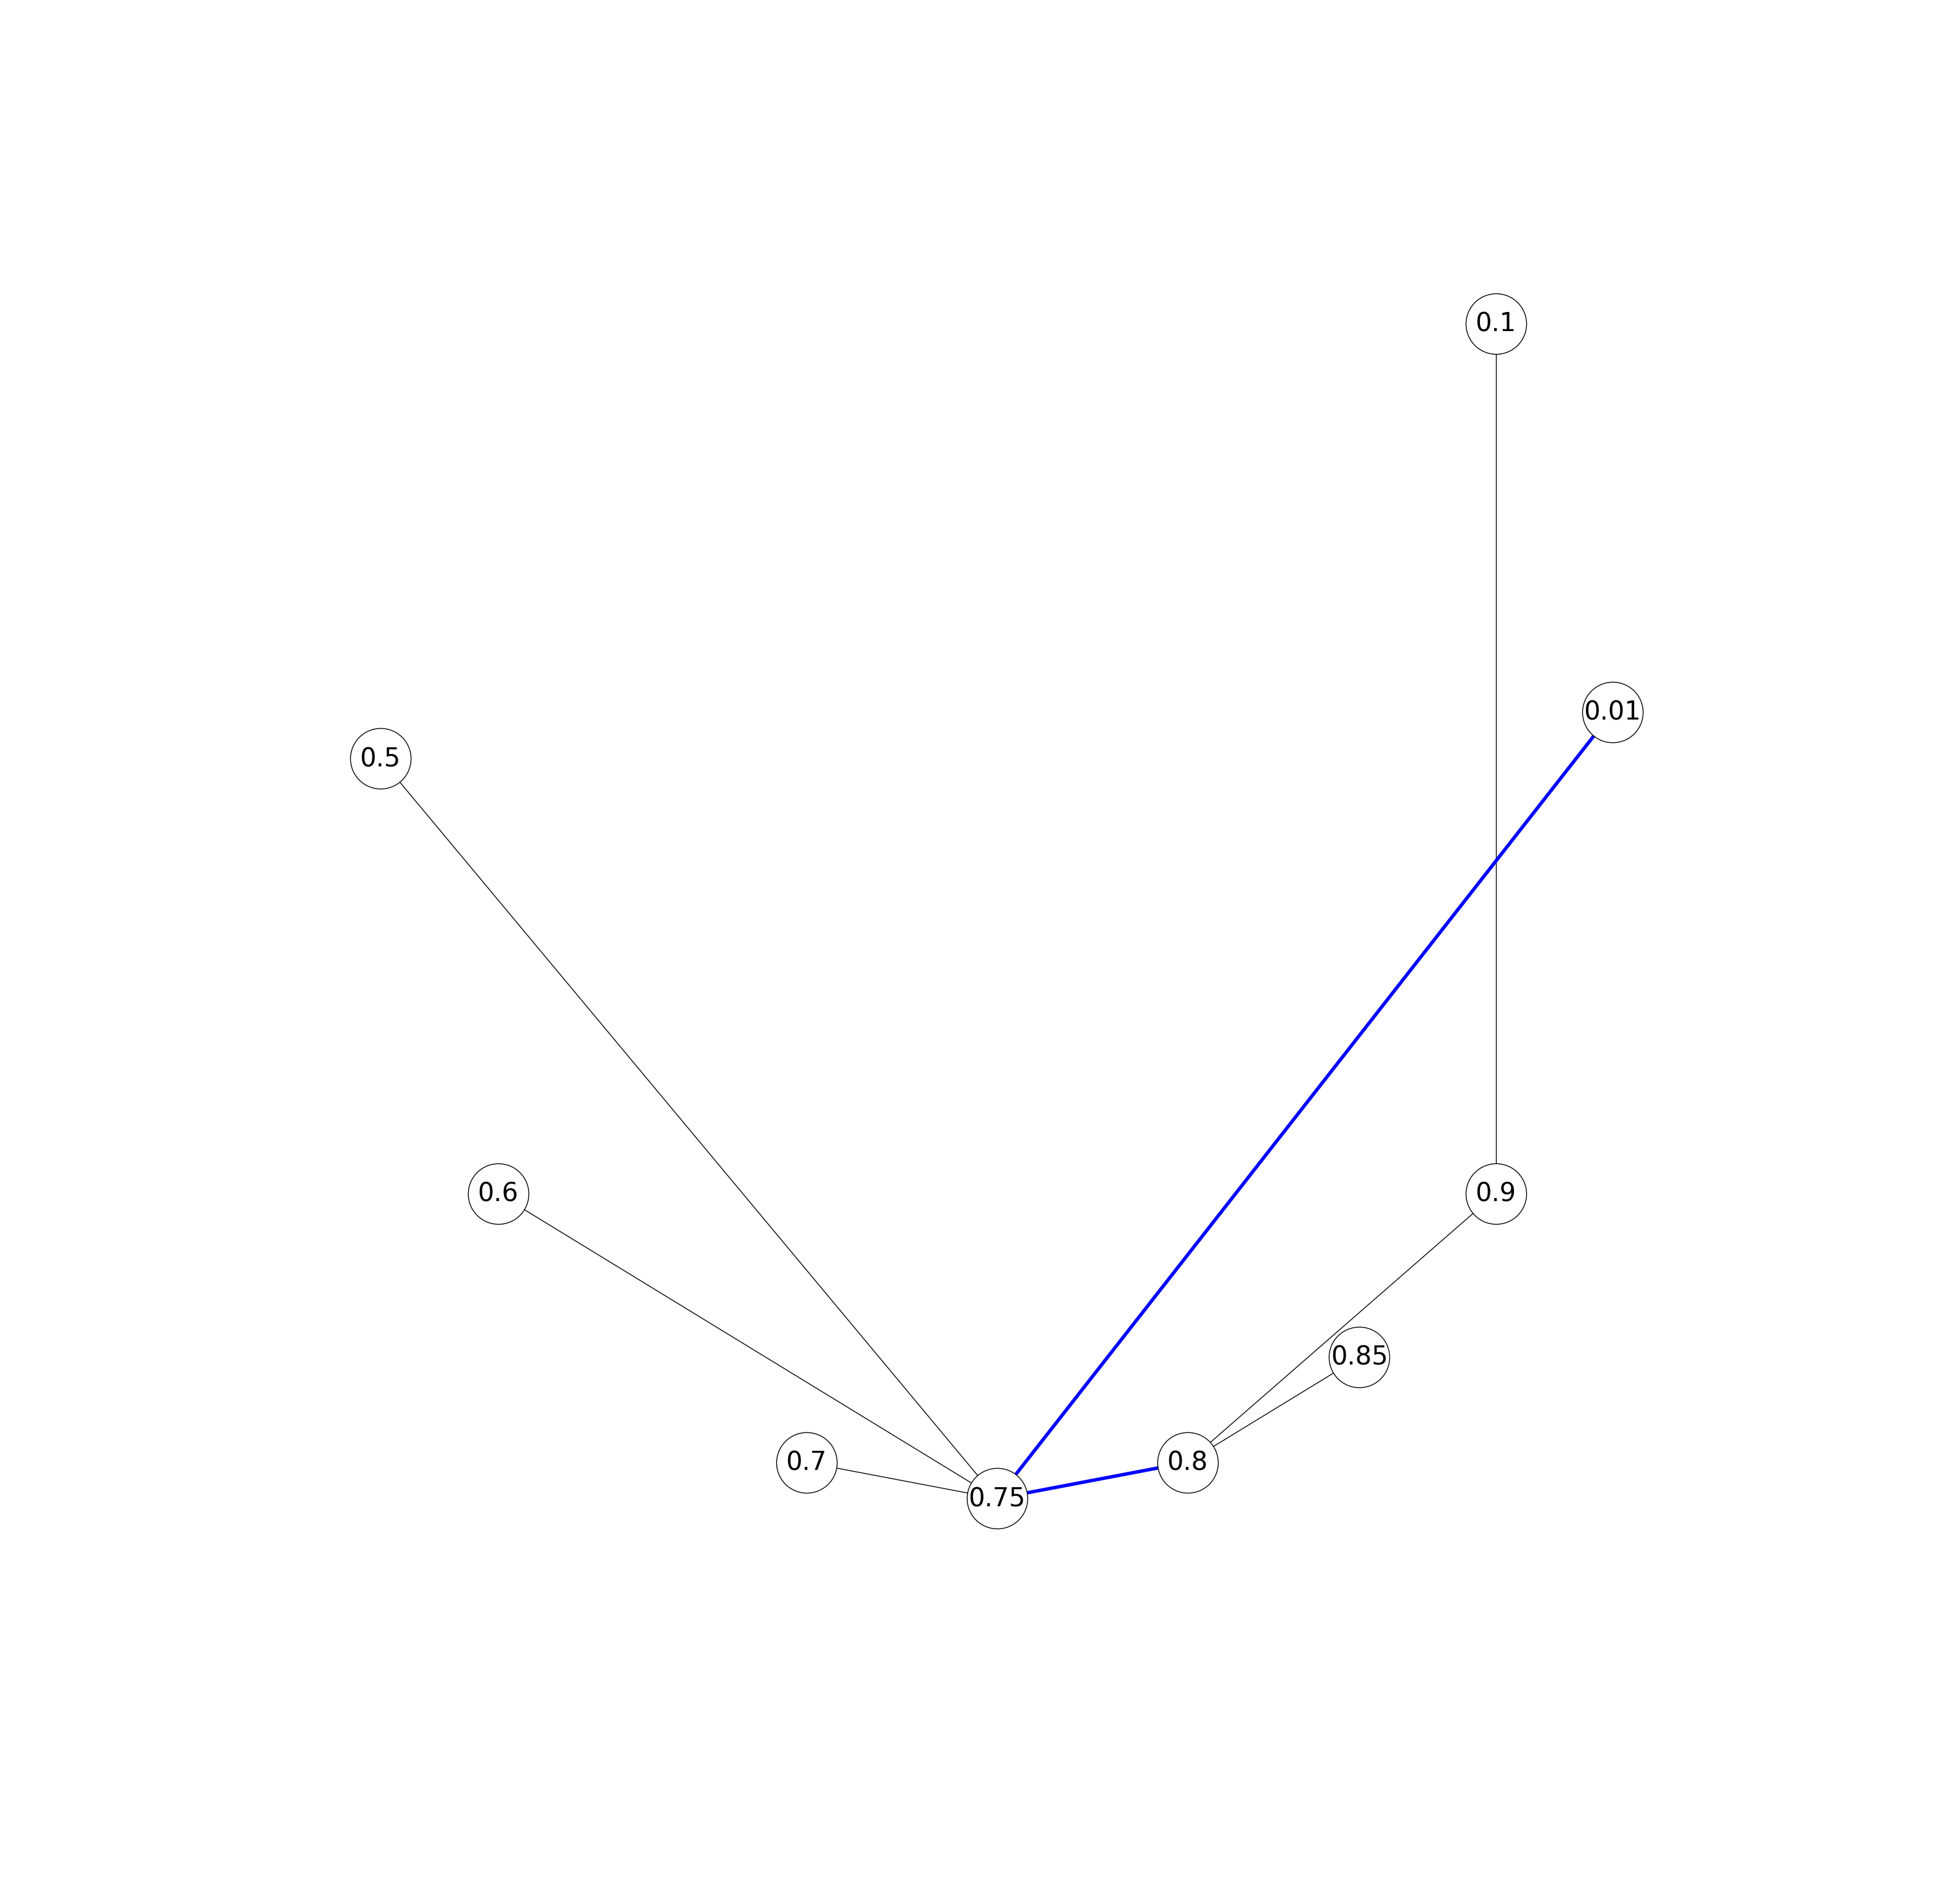

In [24]:
G = nx.Graph()
G.add_edges_from([(0.1,0.9), (0.01,0.75), (0.9,0.8), (0.85,0.8),(0.8,0.75), (0.75,0.7),(0.75,0.6),(0.75,0.5)])
logging.root.setLevel(logging.INFO)
deg_dict = {}
for nd in G.nodes():
    deg_dict[nd] = G.degree(nd)

path, labels, step = greedy_path(G, 0.8, 0.01,ttl=10,strict=False, backtrack=True, deg_dict=deg_dict)
eclist, ewlist = color_path(G, path, width_def=1)
#pos = ordered_circular_layout(G)
#draw_autocrop(plt, pos)
nx.draw(G, pos=pos, with_labels=True, node_size=5000, node_color='w', edge_color=eclist, width=ewlist,font_size=30)
#plt.savefig("fig/d3dfs_example.png")